In [1]:
from sklearn.datasets import fetch_openml

In [2]:
import pandas as pd
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']


In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt


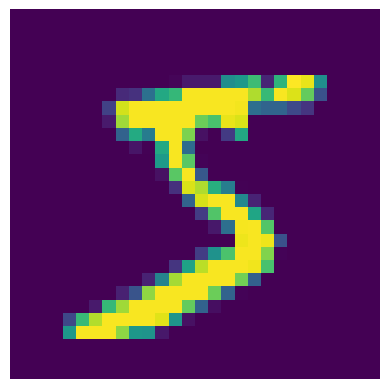

In [9]:
some_digit = X.iloc[0].values

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

In [10]:
y.iloc[0]

'5'

In [11]:
y = y.astype(np.uint8)

In [45]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [46]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [48]:
from sklearn.linear_model import SGDClassifier 

In [50]:
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [51]:
sgd_clf.predict([some_digit])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [52]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [53]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
    

In [54]:
never_5_clf= Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring= 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [55]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [57]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [58]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [59]:
from sklearn.metrics import f1_score 
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [60]:
y_score = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [61]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

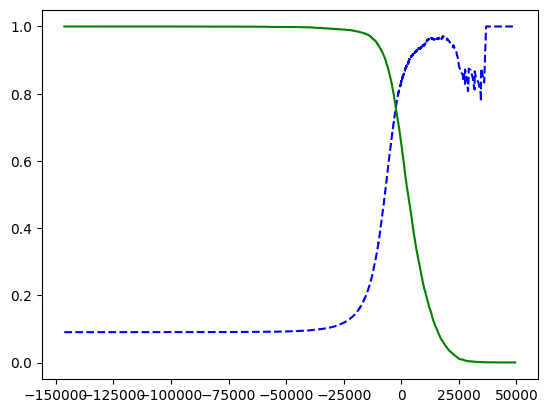

In [62]:
def precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = "Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.axis()
    plt.legend
    
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [63]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [64]:
print(threshold_90_precision )

3370.019499143958


In [65]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [66]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [67]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [68]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

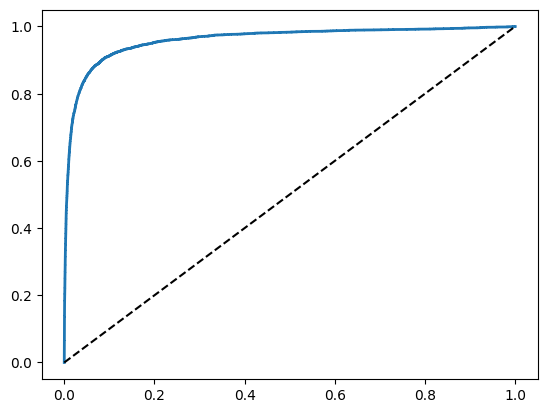

In [69]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state  = 42)
y_prob = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

In [ ]:
y_scores_forest= y_prob[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
sgd_clf.fit(X_train, y_train)



In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
some_digit_score = sgd_clf.decision_function([some_digit])

In [ ]:
some_digit_score

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_search  = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy' , n_jobs = 1, verbose = 2)

grid_search.fit(X_train, y_train_5)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=  20.5s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  20.9s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  20.9s
[CV] END ....................n_neighbors=3, weights=distance; total time=  19.4s
[CV] END ....................n_neighbors=3, weights=distance; total time=  19.9s
[CV] END ....................n_neighbors=3, weights=distance; total time=  19.8s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  20.3s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  20.9s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  20.3s
[CV] END ....................n_neighbors=4, weights=distance; total time=  20.0s
[CV] END ....................n_neighbors=4, weights=distance; total time=  20.0s
[CV] END ....................n_neighbors=4, weig

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [72]:
best_knn= grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test_5, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.9946
